In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

merge_data= pd.read_csv('/content/merged_pizza_data.csv')



In [39]:
import pandas as pd

# Assume merge_data is your DataFrame
# Fill missing pizza_name_y with 'Unknown'
merge_data['pizza_name_y'].fillna('Unknown', inplace=True)

# Check the data after filling missing values
print(merge_data['pizza_name_y'].isnull().sum())  # Should show 0

merge_data['pizza_ingredients_y'].fillna('unknown', inplace=True)
merge_data['Items_Qty_In_Grams'].fillna(merge_data['Items_Qty_In_Grams'].mean(), inplace=True)




0


 Calculate Total Revenue:

In [40]:
merge_data['total_revenue'] = merge_data['quantity'] * merge_data['unit_price']
total_revenue = merge_data['total_revenue'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $4596959.300000001


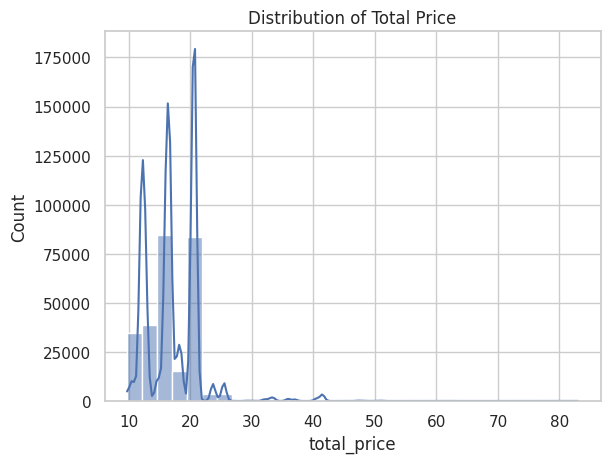

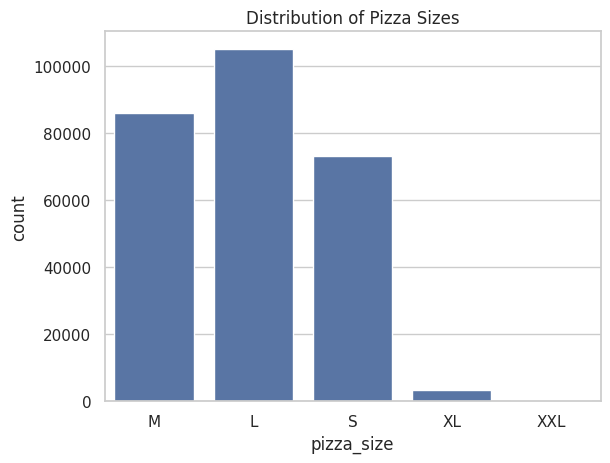

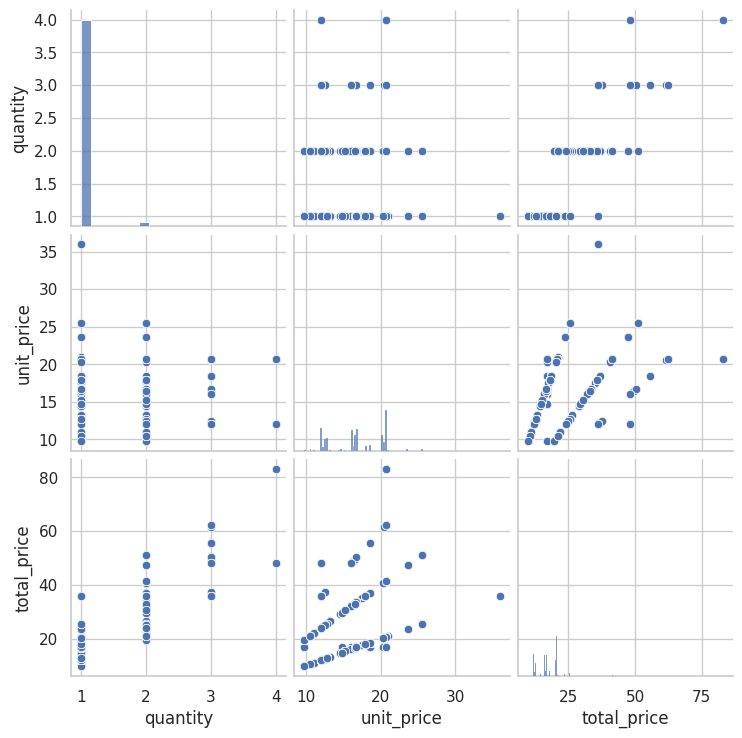

pizza_category
Classic    15.802395
Veggie     16.972163
unknown    17.538889
Supreme    17.691381
Chicken    18.104897
Name: total_price, dtype: float64


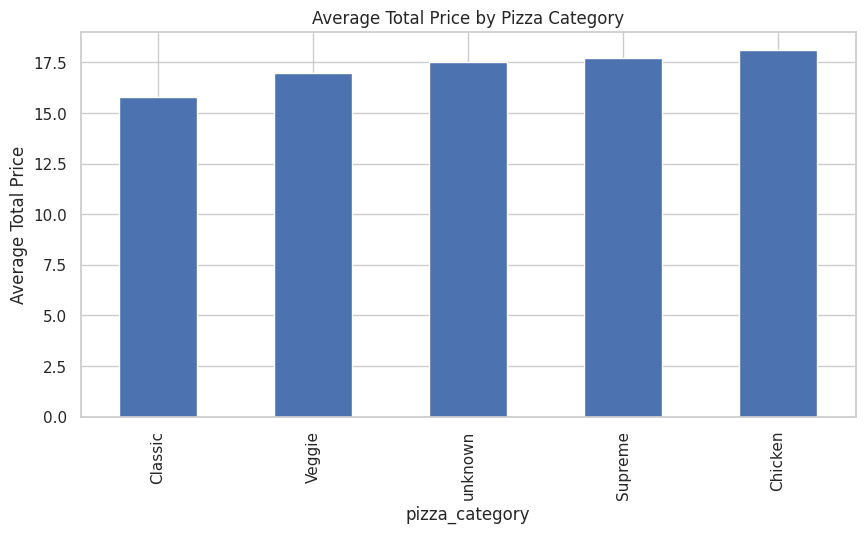

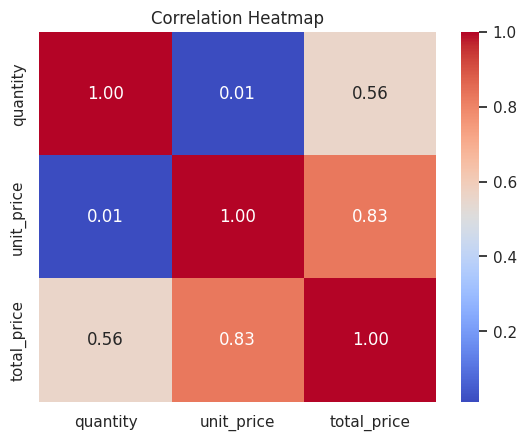

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for 'total_price'
sns.histplot(merge_data['total_price'], bins=30, kde=True)
plt.title("Distribution of Total Price")
plt.show()


# Count plot for 'pizza_size'
sns.countplot(x='pizza_size', data=merge_data)
plt.title("Distribution of Pizza Sizes")
plt.show()


# Pairplot for numerical features
sns.pairplot(merge_data, vars=['quantity', 'unit_price', 'total_price'])
plt.show()

# Group analysis: Average total price by pizza category
avg_price_category = merge_data.groupby('pizza_category')['total_price'].mean().sort_values()
print(avg_price_category)

# Visualization
avg_price_category.plot(kind='bar', title="Average Total Price by Pizza Category", figsize=(10, 5))
plt.ylabel("Average Total Price")
plt.show()

# Correlation matrix
correlation_matrix = merge_data[['quantity', 'unit_price', 'total_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Time Series Analysis

In [42]:
# Convert 'order_datetime' to datetime format
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'], errors='coerce')

# Verify the conversion
print(merge_data['order_datetime'].dtypes)

# Extract date and time features
merge_data['order_month'] = merge_data['order_datetime'].dt.month
merge_data['order_hour'] = merge_data['order_datetime'].dt.hour

# Preview the new columns
print(merge_data[['order_datetime', 'order_month', 'order_hour']].head())


datetime64[ns]
       order_datetime  order_month  order_hour
0 2015-01-01 11:38:36            1          11
1 2015-01-01 11:38:36            1          11
2 2015-01-01 11:38:36            1          11
3 2015-01-01 11:57:40            1          11
4 2015-01-01 11:57:40            1          11


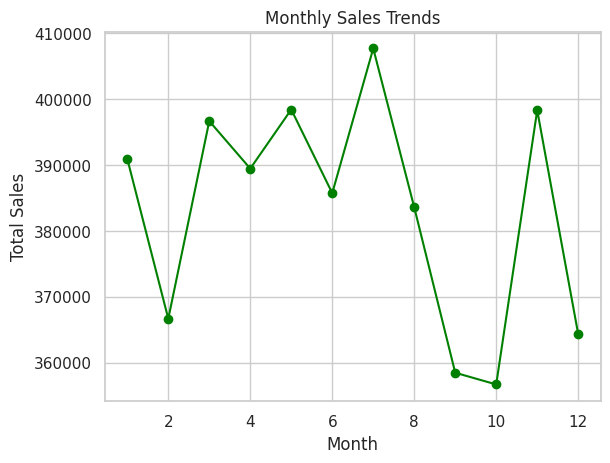

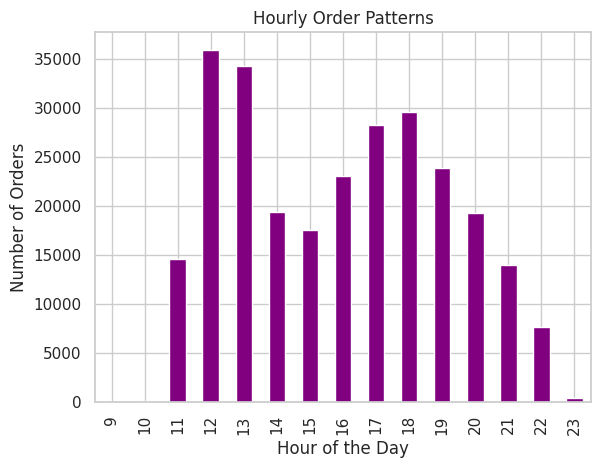

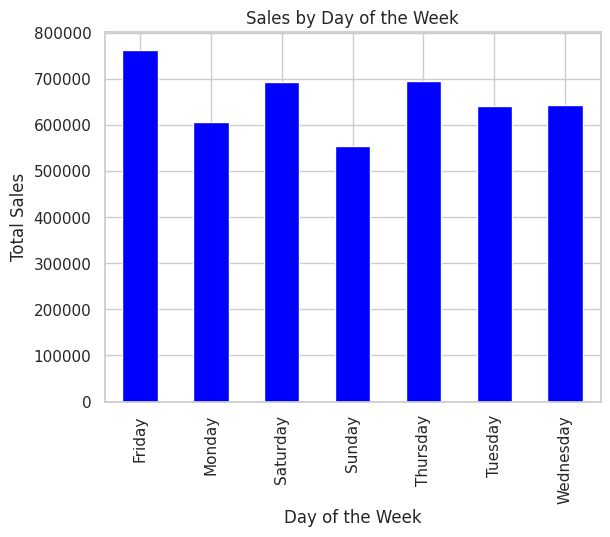

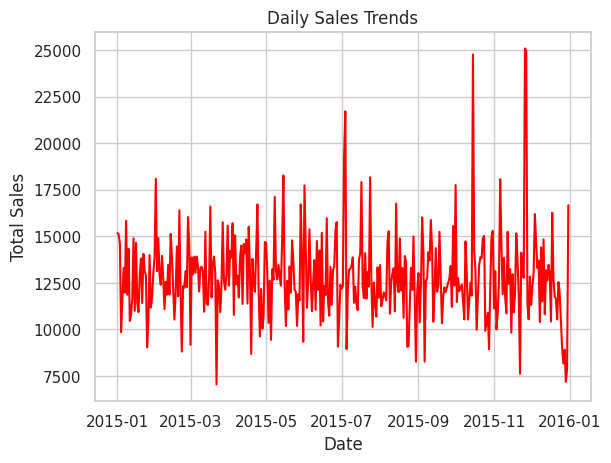

In [43]:
import matplotlib.pyplot as plt

# Extract date and time features
merge_data['order_month'] = merge_data['order_datetime'].dt.month
merge_data['order_hour'] = merge_data['order_datetime'].dt.hour
merge_data['order_day_of_week'] = merge_data['order_datetime'].dt.day_name()

# Monthly Sales Trends
monthly_sales = merge_data.groupby('order_month')['total_price'].sum()
monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Hourly Order Patterns
hourly_orders = merge_data.groupby('order_hour')['order_id'].count()
hourly_orders.plot(kind='bar', color='purple', title='Hourly Order Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Weekly Trends
weekly_sales = merge_data.groupby('order_day_of_week')['total_price'].sum()
weekly_sales.plot(kind='bar', color='blue', title='Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# Daily Sales Trends
daily_sales = merge_data.groupby(merge_data['order_datetime'].dt.date)['total_price'].sum()
daily_sales.plot(kind='line', color='red', title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()





Feature Engineering

Lag Features:

Imagine you're predicting the sales of today, and you know that yesterday’s sales are an important factor in predicting today’s. So, you could create a lag feature:
Lag 1: This feature would be yesterday’s sales, helping the model learn from past behavior.
Rolling Averages:

A rolling average is like a moving average that takes a window of previous days or weeks. For example:
7-day rolling mean: Average sales over the last 7 days. This helps smooth out any fluctuations and capture a trend.
Cyclic Encoding:

Some features like hours of the day or months of the year are cyclical (after hour 23 comes hour 0, after month 12 comes month 1). To represent this cyclic nature, you can apply sine and cosine transformations to the hour or month, so the model understands the circular nature.

month_sin and month_cos capture seasonal patterns (e.g., higher orders during specific months like December).

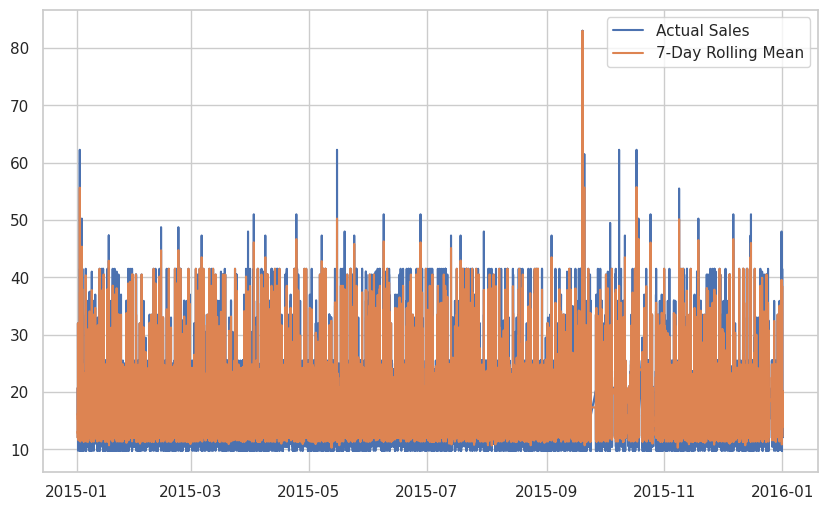

    pizza_id  order_id  pizza_name_id  quantity  unit_price  total_price  \
7          2         2  classic_dlx_m         1        16.0         16.0   
8          3         2  five_cheese_l         1        18.5         18.5   
9          3         2  five_cheese_l         1        18.5         18.5   
10         3         2  five_cheese_l         1        18.5         18.5   
11         3         2  five_cheese_l         1        18.5         18.5   

   pizza_size pizza_category  \
7           M        Classic   
8           L         Veggie   
9           L         Veggie   
10          L         Veggie   
11          L         Veggie   

                                  pizza_ingredients_x  \
7   Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
8   Mozzarella Cheese, Provolone Cheese, Smoked Go...   
9   Mozzarella Cheese, Provolone Cheese, Smoked Go...   
10  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
11  Mozzarella Cheese, Provolone Cheese, Smoked Go...   

       

In [44]:
import pandas as pd
import numpy as np

# Assuming 'merge_data' is your dataframe
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'])

# 1. Extract time-based features
merge_data['month'] = merge_data['order_datetime'].dt.month
merge_data['day'] = merge_data['order_datetime'].dt.day
merge_data['day_of_week'] = merge_data['order_datetime'].dt.dayofweek  # Monday=0, Sunday=6
merge_data['hour'] = merge_data['order_datetime'].dt.hour
merge_data['day_of_year'] = merge_data['order_datetime'].dt.dayofyear

# 2. Create a 'Is Weekend' feature
merge_data['is_weekend'] = merge_data['day_of_week'].isin([5, 6]).astype(int)

# 3. Lag features (e.g., 1-day lag, 7-day lag for total_price)
merge_data['total_price_lag_1'] = merge_data['total_price'].shift(1)
merge_data['total_price_lag_7'] = merge_data['total_price'].shift(7)

# 4. Rolling mean and standard deviation (e.g., 7-day window)
merge_data['total_price_roll_mean_7'] = merge_data['total_price'].rolling(window=7).mean()
merge_data['total_price_roll_std_7'] = merge_data['total_price'].rolling(window=7).std()

# 5. Cyclic encoding for hour, month, and day of the week
merge_data['hour_sin'] = np.sin(2 * np.pi * merge_data['hour'] / 24)
merge_data['hour_cos'] = np.cos(2 * np.pi * merge_data['hour'] / 24)

merge_data['month_sin'] = np.sin(2 * np.pi * merge_data['month'] / 12)
merge_data['month_cos'] = np.cos(2 * np.pi * merge_data['month'] / 12)

merge_data['day_of_week_sin'] = np.sin(2 * np.pi * merge_data['day_of_week'] / 7)
merge_data['day_of_week_cos'] = np.cos(2 * np.pi * merge_data['day_of_week'] / 7)

# Drop rows with NaN values (for lag and rolling features)
merge_data = merge_data.dropna()


import matplotlib.pyplot as plt

# Example: Plot rolling mean and actual total_price
plt.figure(figsize=(10, 6))
plt.plot(merge_data['order_datetime'], merge_data['total_price'], label='Actual Sales')
plt.plot(merge_data['order_datetime'], merge_data['total_price_roll_mean_7'], label='7-Day Rolling Mean')
plt.legend()
plt.show()


# Display the dataframe to check the new features
print(merge_data.head())


In [22]:
merge_data.columns


Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients_x',
       'pizza_name_x', 'order_datetime', 'pizza_name_y', 'pizza_ingredients_y',
       'Items_Qty_In_Grams', 'total_revenue', 'order_month', 'order_hour',
       'order_day_of_week', 'month', 'day', 'day_of_week', 'hour',
       'day_of_year', 'is_weekend', 'total_price_lag_1', 'total_price_lag_7',
       'total_price_roll_mean_7', 'total_price_roll_std_7', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos'],
      dtype='object')

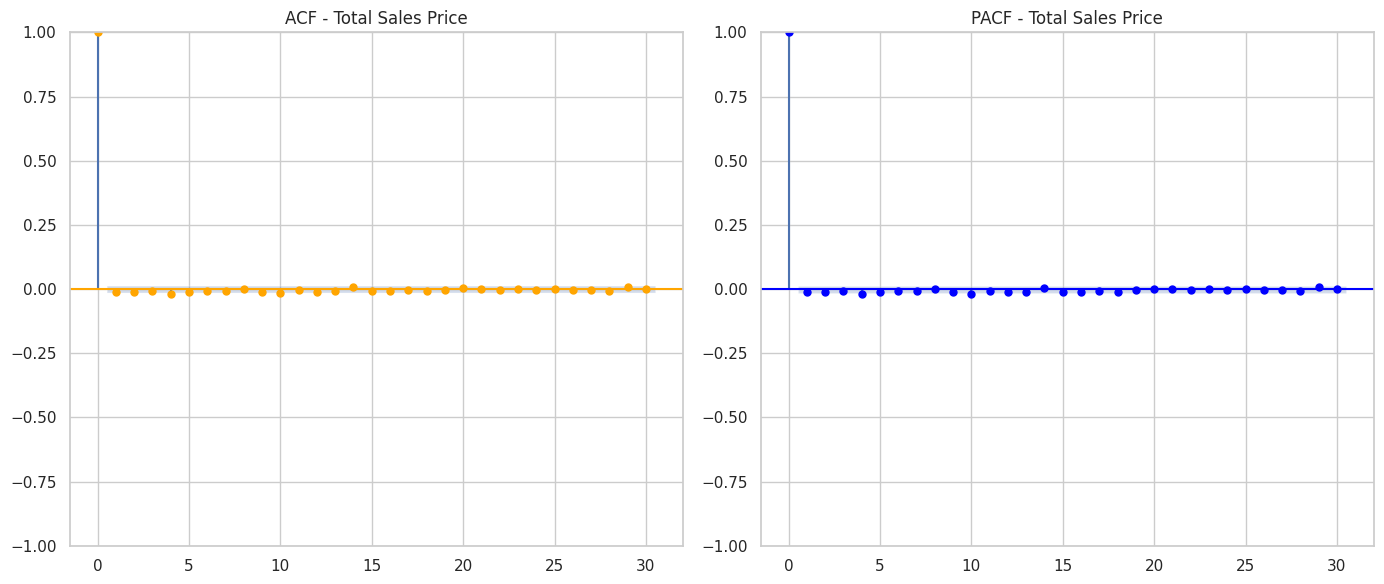

In [45]:
daily_sales = merge_data.groupby('order_datetime').agg({'total_price': 'sum', 'quantity': 'sum'}).reset_index()


# Plotting ACF and PACF for time series sales data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(daily_sales['total_price'], lags=30, ax=plt.gca(), color='orange')
plt.title('ACF - Total Sales Price')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(daily_sales['total_price'], lags=30, ax=plt.gca(), color='blue')
plt.title('PACF - Total Sales Price')

plt.tight_layout()
plt.show()


In [46]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on total sales
result = adfuller(daily_sales['total_price'])
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}, p-value: {p_value}')

# Check for stationarity based on p-value
if p_value <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


ADF Statistic: -48.95969873281019, p-value: 0.0
The time series is stationary.


Overall MAPE: 16.83%


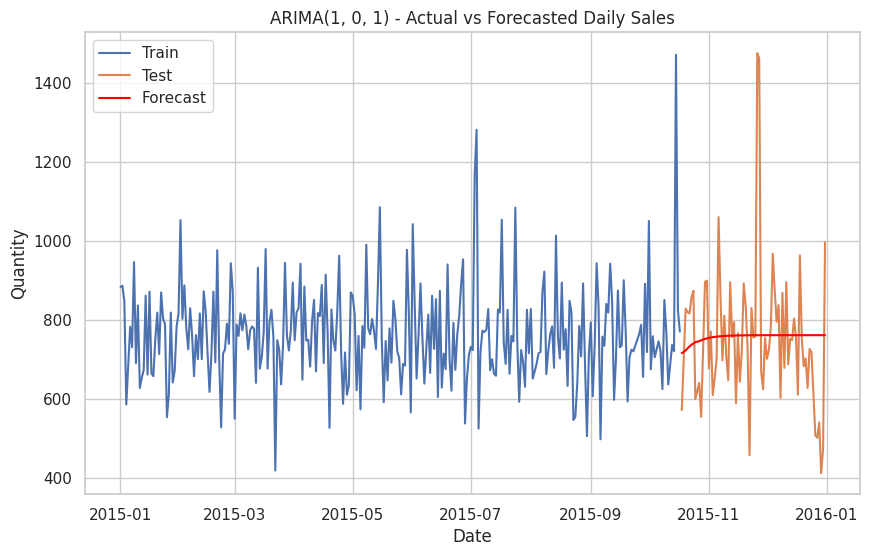

In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Convert 'order_datetime' to pandas datetime format if not already
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'], errors='coerce')

# Step 2: Create a new column for daily sales (aggregating 'quantity' per day)
daily_sales = merge_data.groupby(merge_data['order_datetime'].dt.date)['quantity'].sum().reset_index()
daily_sales['order_datetime'] = pd.to_datetime(daily_sales['order_datetime'])

# Step 3: Function to train ARIMA model and calculate overall MAPE
def evaluate_arima_model_overall(data, p, d, q):
    actual_values = []
    predicted_values = []

    # Set 'order_datetime' as index if not already set
    if not data.index.name == 'order_datetime':
        data = data.set_index('order_datetime')

    # Split the data into training and testing sets (80-20 split)
    split_point = int(len(data) * 0.8)
    train, test = data['quantity'][:split_point], data['quantity'][split_point:]

    # Build the ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()

    # Forecast for the length of the test set
    forecast = fitted_model.forecast(steps=len(test))

    # Collect actual and predicted values for overall MAPE calculation
    actual_values.extend(test.values)
    predicted_values.extend(forecast)

    # Calculate overall MAPE
    overall_mape = mean_absolute_percentage_error(actual_values, predicted_values)

    return overall_mape, train, test, forecast

# Step 4: Evaluate the model with the chosen p, d, q values
p, d, q = 1, 0, 1  # You can change these values based on the best fit for your data
overall_mape, train, test, forecast = evaluate_arima_model_overall(daily_sales, p, d, q)

# Step 5: Display the overall MAPE
print(f'Overall MAPE: {overall_mape:.2%}')

# Step 6: Plotting Actual vs Forecasted Values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title(f'ARIMA({p}, {d}, {q}) - Actual vs Forecasted Daily Sales')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


Daily Sales Data (First 5 rows):
   order_date  daily_quantity
0  2015-01-01             884
1  2015-01-02             887
2  2015-01-03             847
3  2015-01-04             586
4  2015-01-05             687

Forecasted Sales for the Next 7 Days:
    forecasted_date  forecasted_quantity
358      2016-01-01           797.675009
359      2016-01-02           753.618159
360      2016-01-03           763.143408
361      2016-01-04           761.084015
362      2016-01-05           761.529263
363      2016-01-06           761.432999
364      2016-01-07           761.453812

Ingredient Requirements for the Next 7 Days:
Pepperoni: 347.09 grams
Mushrooms: 364.32 grams
Red Onions: 813.12 grams
Red Peppers: 643.61 grams
Bacon: 135.61 grams
Mozzarella Cheese: 259.55 grams
Provolone Cheese: 12.64 grams
Smoked Gouda Cheese: 12.64 grams
Romano Cheese: 12.64 grams
Blue Cheese: 12.64 grams
Garlic: 1218.95 grams
Calabrese Salami: 82.87 grams
Capocollo: 365.12 grams
Tomatoes: 1184.43 grams
Green Ol

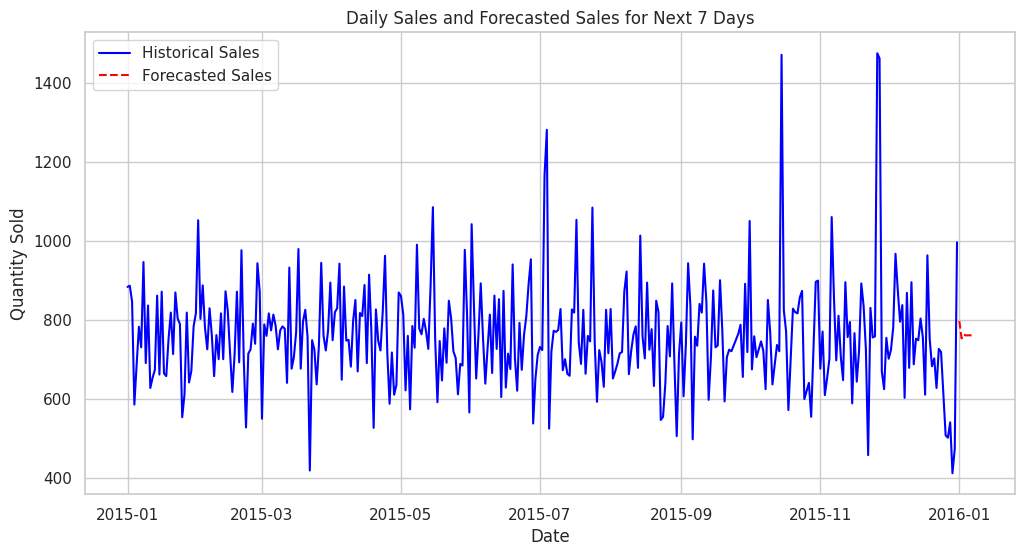

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# 1. Data Aggregation for Daily Sales
# =====================================
# 'order_datetime' contains the timestamp of each order.
# Group by date to calculate daily sales quantity.
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'])  # Ensure datetime format
daily_sales = merge_data.groupby(merge_data['order_datetime'].dt.date)['quantity'].sum().reset_index()

# Rename columns for clarity
daily_sales.columns = ['order_date', 'daily_quantity']

print("Daily Sales Data (First 5 rows):")
print(daily_sales.head())

# 2. Train ARIMA Model to Forecast Sales
# =======================================
# ARIMA requires a univariate time series. We use daily sales quantities.

p, d, q = 1, 0, 1  # Initial ARIMA parameters (can be tuned)
model = ARIMA(daily_sales['daily_quantity'], order=(p, d, q))  # Train ARIMA
fitted_model = model.fit()

# Forecast the next 7 days
forecast_steps = 7
forecasted_quantities = fitted_model.forecast(steps=forecast_steps)

# Generate forecasted dates
last_date = daily_sales['order_date'].max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Combine forecast results into a DataFrame
forecast_df = pd.DataFrame({
    'forecasted_date': forecast_dates,
    'forecasted_quantity': forecasted_quantities
})

print("\nForecasted Sales for the Next 7 Days:")
print(forecast_df)

# 3. Estimate Ingredient Requirements Based on Forecast
# =======================================================
# We'll calculate total ingredient quantities using the "pizza_ingredients_x" column.
# "Items_Qty_In_Grams" gives the total quantity required per pizza.

# Extract relevant columns for simplicity
pizza_ingredients = merge_data[['pizza_name_x', 'pizza_ingredients_x', 'Items_Qty_In_Grams']].drop_duplicates()

# Dictionary to store total ingredient requirements
ingredient_totals = {}

# Loop through each pizza to calculate ingredient needs
for _, row in pizza_ingredients.iterrows():
    pizza_name = row['pizza_name_x']
    ingredients_list = row['pizza_ingredients_x'].split(', ')  # Split ingredients
    qty_per_pizza = row['Items_Qty_In_Grams'] / 100  # Normalize quantity (assuming grams per pizza)

    # Assume each pizza contributes equally to forecasted sales
    forecasted_quantity = forecast_df['forecasted_quantity'].sum() / len(pizza_ingredients)

    # Update ingredient totals
    for ingredient in ingredients_list:
        if ingredient not in ingredient_totals:
            ingredient_totals[ingredient] = 0
        ingredient_totals[ingredient] += forecasted_quantity * qty_per_pizza

# Print total ingredient requirements
print("\nIngredient Requirements for the Next 7 Days:")
for ingredient, total_qty in ingredient_totals.items():
    print(f"{ingredient}: {total_qty:.2f} grams")

# 4. Visualization for Better Understanding
# ===========================================

# Plot historical sales and forecasted values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(daily_sales['order_date'], daily_sales['daily_quantity'], label='Historical Sales', color='blue')

# Plot forecasted data
plt.plot(forecast_df['forecasted_date'], forecast_df['forecasted_quantity'],
         label='Forecasted Sales', color='red', linestyle='--')

# Add plot details
plt.title('Daily Sales and Forecasted Sales for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# Create a DataFrame from the ingredient totals dictionary
ingredient_totals_df = pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Total_Quantity'])

# Save the DataFrame to a CSV file
ingredient_totals_df.to_csv('/content/ingredient_details.csv', index=False)

print("Ingredient requirements saved to 'ingredient_requirements.csv'.")

Ingredient requirements saved to 'ingredient_requirements.csv'.


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 10 to 64
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ingredient      66 non-null     object 
 1   Total_Quantity  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB

Ingredient Totals DataFrame:
                    Ingredient  Total_Quantity
10                      Garlic     1218.954708
13                    Tomatoes     1184.426443
2                   Red Onions      813.118076
3                  Red Peppers      643.614553
19                     Chicken      382.882694
12                   Capocollo      365.123867
1                    Mushrooms      364.316648
30                     Spinach      355.163980
0                    Pepperoni      347.091786
5            Mozzarella Cheese      259.547757
28                 Feta Cheese      257.763690
65                     unknown      253.557972
15    

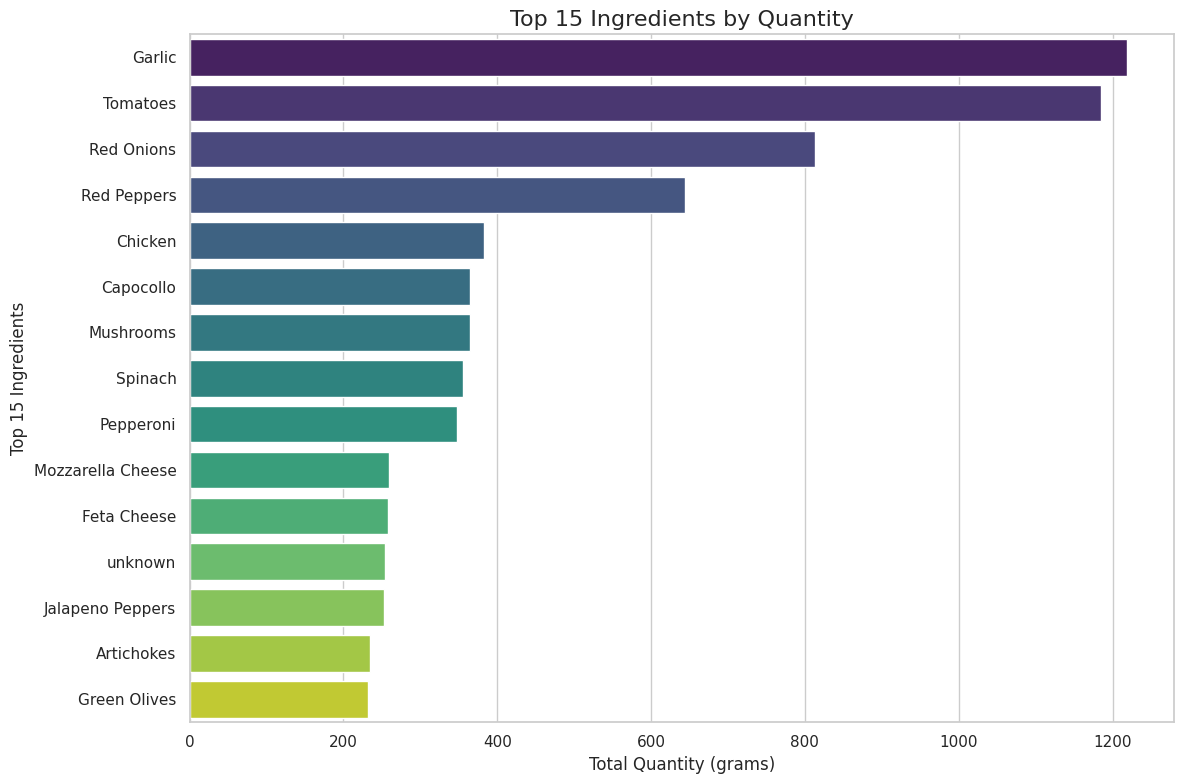

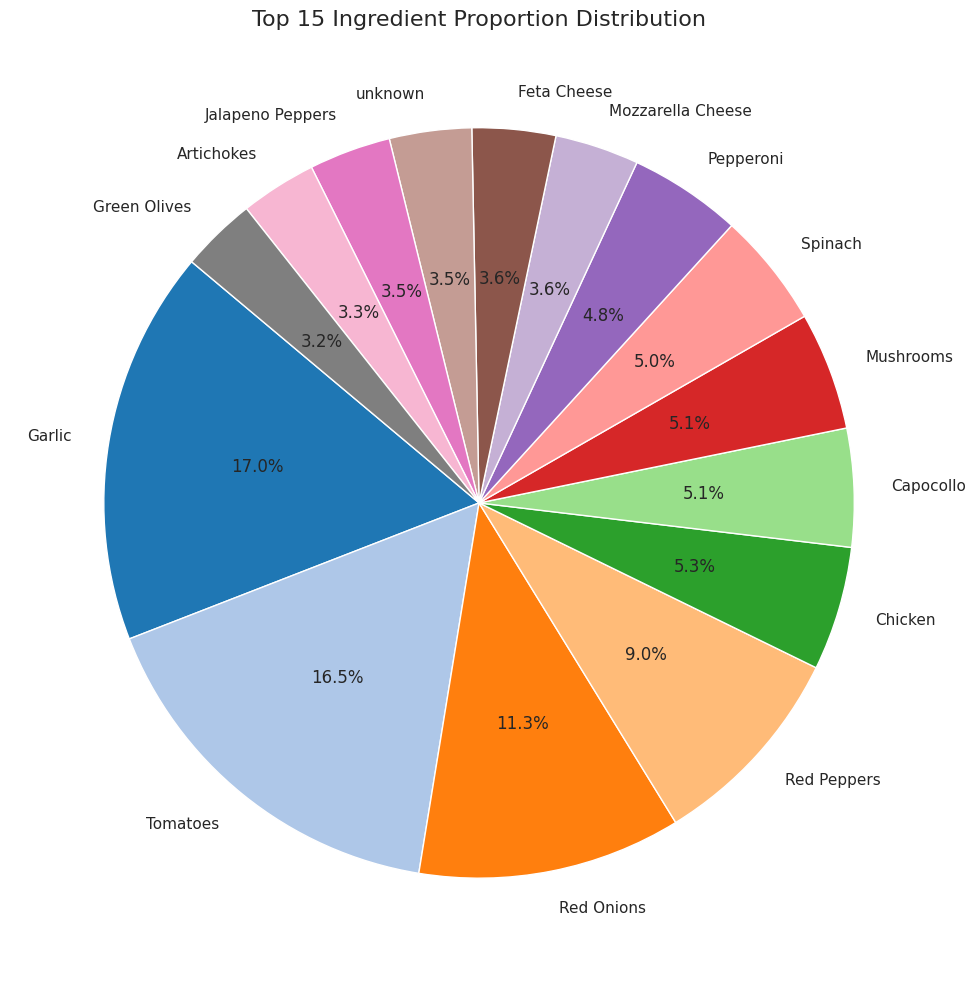

In [60]:

print("DataFrame Information:")
ingredient_totals_df.info()

# Display the full DataFrame
pd.set_option("display.max_rows", None)
print("\nIngredient Totals DataFrame:")
print(ingredient_totals_df)

# ================= Step 2: Data Analysis =================
# Sort the data by 'Total_Quantity' in descending order
ingredient_totals_df = ingredient_totals_df.sort_values(by='Total_Quantity', ascending=False)

# ================= Step 3: Visualization =================

# ---------- 1. Top 15 Bar Plot: Ingredient Requirements ----------
top_15_ingredients = ingredient_totals_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_ingredients, x='Total_Quantity', y='Ingredient', palette='viridis')
plt.title('Top 15 Ingredients by Quantity', fontsize=16)
plt.xlabel('Total Quantity (grams)', fontsize=12)
plt.ylabel('Top 15 Ingredients', fontsize=12)
plt.tight_layout()
plt.show()

# ---------- 2. Pie Chart: Top 15 Ingredient Proportions ----------
plt.figure(figsize=(10, 10))
plt.pie(top_15_ingredients['Total_Quantity'], labels=top_15_ingredients['Ingredient'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20', len(top_15_ingredients)))
plt.title('Top 15 Ingredient Proportion Distribution', fontsize=16)
plt.tight_layout()
plt.show()